# Laboratorium 8

## Znajdywanie pierwiastków

In [7]:
# using Roots
# using ForwardDiff
# Sample function
f(x) = cos(x) - x*2

f (generic function with 1 method)

Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków:

- wykorzystującą przedział i zmianę znaku,
- wykorzystującą pochodną,
- wykorzystującą przybliżenie pochodnej

1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka ! (3 pkt)

2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować wstegę Newtona i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

### Zadanie A

#### Metoda wykorzystująca przedział i zmianę znaku funkcji - Metoda Bisekcji

Opiera się ona na twierdzeniu Darboux: Jeżeli funkcja ciągła f(x) ma na końcach przedziału domkniętego wartości różnych znaków, to wewnątrz tego przedziału, istnieje co najmniej jeden pierwiastek równania f(x) = 0.

Założenia:
1. Funkcja f(x) jest ciągła w przedziale domkniętym [a; b]
2. Funkcja przyjmuje różne znaki na końcach przedziału: f(a)*f(b) < 0

Algorytm polega na połowieniu przedziałów, których znaki krańców się różnią - gwarantuje to znalezienie pierwiastka.

Gwarantuje ona znalezienie jednego pierwiastka funkcji spełniającej założenia. Jej rząd zbieżności jest liniowy, jest zatem wolno zbieżna.

In [8]:
find_zero(f, (0,1), Bisection())

0.45018361129487355

#### Metoda wykorzystująca pochodną - Metoda Newtona

### Zadanie B

#### Wstęga Newtona

Wstęga Newtona to fraktal tworzony w płaszczyźnie liczb zespolonych. Powstaje on przez kolejne iteracje metody Newtona stosowanej na pewnej funkcji o N pierwiastkach zespolonych. Każdy z N pierwiastków stanowi punkt startowy dla iteracji Newtona. Jeśli ciąg puntków generowanych iteracyjnie zbiega do jednego z N pierwiastków, ciąg ten kolorowany jest swoistym dla tego pierwiastka kolorem. Jednak każdy wielomian stopnia co najmniej drugiego, podlegający iteracji Newtona, posiada punkty niezbiegające do żadnego z pierwiastków, wyznaczany jest dla nich kolor N+1.

#### $f(z)=z^3-1$

- Dzięki pakietowi Fatou wygenerować można wzory na wartości $z$ w kolejnych iteracjach:

In [53]:
using Fatou
map(display,[basin(newton(:(z^3-1)),i) for i ∈ 1:3])

L"$\displaystyle D_1(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(2 z^{3}+1\right)/\left(3 z^{2}\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

L"$\displaystyle D_2(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(2 \left(2 z^{3}+1\right)^{3}+27 z^{6}\right)/\left(9 \left(2 z^{3}+1
\right)^{2} z^{2}\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

L"$\displaystyle D_3(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(2 \left(2 \left(2 z^{3}+1\right)^{3}+27 z^{6}\right)^{3}+729 \left(2 z^{
3}+1\right)^{6} z^{6}\right)/\left(27 \left(2 \left(2 z^{3}+1\right)^{3}+27 z
^{6}\right)^{2} \left(2 z^{3}+1\right)^{2} z^{2}\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

3-element Vector{Nothing}:
 nothing
 nothing
 nothing

- Wstęgę wygenerowałam przy pomocy następującego kodu w MATLAB:

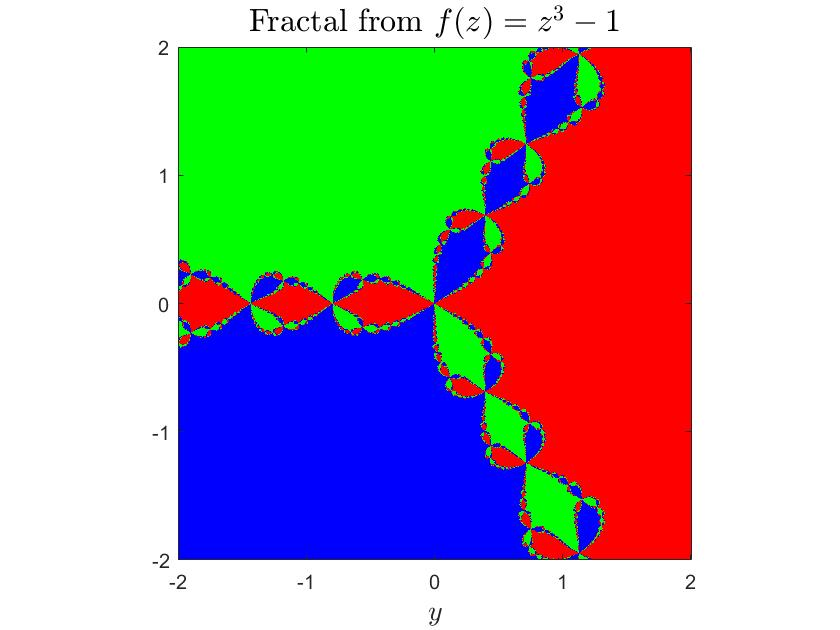